In [2]:
import backtrader as bt

In [6]:
import pandas as pd

df = pd.read_csv('../datasets/individual_stocks_5yr/AAPL_data.csv')

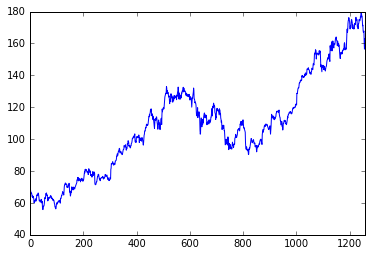

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

df['close'].plot()

In [11]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [24]:
data = bt.feeds.GenericCSVData(
    dataname='../datasets/individual_stocks_5yr/AAPL_data.csv',
    dtformat=('%Y-%m-%d'),
    tmformat=('%H.%M.%S'),
    datetime=0,
    open=1,
    high=2,
    low=3,
    close=4,
    volume=5,
    openinterest=-1)

In [25]:
cerebro = bt.Cerebro()
cerebro.adddata(data)

In [26]:
cerebro.run()

In [27]:
cerebro.broker.getvalue()

10000.0

In [116]:
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )
    
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)
        
        # Indicators for the plotting show
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
                                            subplot=True)
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        bt.indicators.ATR(self.datas[0], plot=False)
        
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
        
    def notify_order(self, order):
        if  order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in  [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED, Price: {order.executed.price}, \
                         Cost: {order.executed.value}, \
                         Comm: {order.executed.comm}')
            else:
                self.log(f'BUY EXECUTED, Price: {order.executed.price}, \
                         Cost: {order.executed.value}, \
                         Comm: {order.executed.comm}')
                
            self.bar_executed = len(self)
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(f'OPERATION PROFI, GROSS {trade.pnl}, NET {trade.pnlcomm}')
        
        
    def next(self):
        self.log(f'Close, {self.dataclose[0]}')
        
        if self.order:
            return
        
        if not self.position:
            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:
            if self.dataclose[0] < self.sma[0]:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
        
            

In [117]:
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)

data = bt.feeds.GenericCSVData(
    dataname='../datasets/individual_stocks_5yr/AAPL_data.csv',
    dtformat=('%Y-%m-%d'),
    tmformat=('%H.%M.%S'),
    datetime=0,
    open=1,
    high=2,
    low=3,
    close=4,
    volume=5,
    openinterest=-1)

cerebro.adddata(data)

In [118]:
cerebro.run()

2013-03-28, Close, 63.2371
2013-04-01, Close, 61.2728
2013-04-02, Close, 61.3988
2013-04-03, Close, 61.7128
2013-04-04, Close, 61.1028
2013-04-05, Close, 60.4571
2013-04-08, Close, 60.8871
2013-04-09, Close, 60.9971
2013-04-10, Close, 62.2414
2013-04-11, Close, 62.0471
2013-04-12, Close, 61.3999
2013-04-15, Close, 59.9785
2013-04-16, Close, 60.8914
2013-04-17, Close, 57.5428
2013-04-18, Close, 56.0071
2013-04-19, Close, 55.7899
2013-04-22, Close, 56.9528
2013-04-23, Close, 58.0185
2013-04-24, Close, 57.9231
2013-04-25, Close, 58.3399
2013-04-26, Close, 59.6007
2013-04-26, BUY CREATE, 59.60
2013-04-29, BUY EXECUTED, Price: 60.0642,                          Cost: 60.0642,                          Comm: 0.0
2013-04-29, Close, 61.4457
2013-04-30, Close, 63.2542
2013-05-01, Close, 62.7557
2013-05-02, Close, 63.6457
2013-05-03, Close, 64.2828
2013-05-06, Close, 65.8156
2013-05-07, Close, 65.5225
2013-05-08, Close, 66.2628
2013-05-09, Close, 65.2528
2013-05-10, Close, 64.7099
2013-05-13, Clos

2017-04-19, Close, 140.68
2017-04-20, Close, 142.44
2017-04-21, Close, 142.27
2017-04-24, Close, 143.64
2017-04-24, BUY CREATE, 143.64
2017-04-25, BUY EXECUTED, Price: 143.91,                          Cost: 143.91,                          Comm: 0.0
2017-04-25, Close, 144.53
2017-04-26, Close, 143.68
2017-04-27, Close, 143.79
2017-04-28, Close, 143.65
2017-05-01, Close, 146.58
2017-05-02, Close, 147.51
2017-05-03, Close, 147.06
2017-05-04, Close, 146.53
2017-05-05, Close, 148.96
2017-05-08, Close, 153.01
2017-05-09, Close, 153.99
2017-05-10, Close, 153.26
2017-05-11, Close, 153.95
2017-05-12, Close, 156.1
2017-05-15, Close, 155.7
2017-05-16, Close, 155.47
2017-05-17, Close, 150.25
2017-05-17, SELL CREATE, 150.25
2017-05-18, BUY EXECUTED, Price: 151.27,                          Cost: 143.91,                          Comm: 0.0
2017-05-18, OPERATION PROFI, GROSS 7.360000000000014, NET 7.360000000000014
2017-05-18, Close, 152.54
2017-05-18, BUY CREATE, 152.54
2017-05-19, BUY EXECUTED, Pric

In [119]:
cerebro.broker.getvalue()

10063.600699999997

/home/tom/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


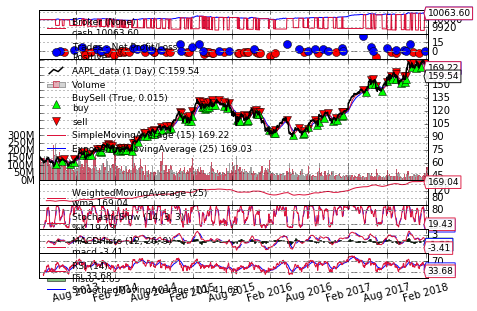

[[<matplotlib.figure.Figure at 0x7f0f73bf58d0>]]

In [120]:
cerebro.plot()

In [108]:
help(cerebro.plot)

Help on method plot in module backtrader.cerebro:

plot(plotter=None, numfigs=1, iplot=True, start=None, end=None, width=16, height=9, dpi=300, tight=True, use=None, **kwargs) method of backtrader.cerebro.Cerebro instance
    Plots the strategies inside cerebro
    
    If ``plotter`` is None a default ``Plot`` instance is created and
    ``kwargs`` are passed to it during instantiation.
    
    ``numfigs`` split the plot in the indicated number of charts reducing
    chart density if wished
    
    ``iplot``: if ``True`` and running in a ``notebook`` the charts will be
    displayed inline
    
    ``use``: set it to the name of the desired matplotlib backend. It will
    take precedence over ``iplot``
    
    ``start``: An index to the datetime line array of the strategy or a
    ``datetime.date``, ``datetime.datetime`` instance indicating the start
    of the plot
    
    ``end``: An index to the datetime line array of the strategy or a
    ``datetime.date``, ``datetime.datetime